In [83]:
!pip install imbalanced-learn

In [97]:
#Import necessary libraries 
import pandas as pd #for handling datsets
import numpy as np  #for numerical computations
import matplotlib.pyplot as plt # fpr creating plots
import seaborn as sns  #for advance visualizations
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score



# That plots are displayed inside the Jupyter Notebook instaed using plt.show()
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("bank-full.csv", sep=";" )

In [4]:
# Display the first five rows of the dataset
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
#Display dataset info including columns,non-null count,Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#check the shape of the dataset(number of rows, number of columns)
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 45211 rows and 17 columns.


In [9]:
df.shape

(45211, 17)

In [10]:
#check for missing values in each column
missing_values = df.isnull().sum()

In [11]:
#Display only columns that have missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [12]:
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
#Generate descriptive statistics fro numercal columns
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [16]:
# Display unique values in categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_cols:
    print(f"\nUnique values in '{col}':") #\n ensures each column’s output starts on a new line for better readability
    print(df[col].unique())


Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced']

Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in 'default':
['no' 'yes']

Unique values in 'housing':
['yes' 'no']

Unique values in 'loan':
['no' 'yes']

Unique values in 'contact':
['unknown' 'cellular' 'telephone']

Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']

Unique values in 'y':
['no' 'yes']


Text(0, 0.5, 'Count')

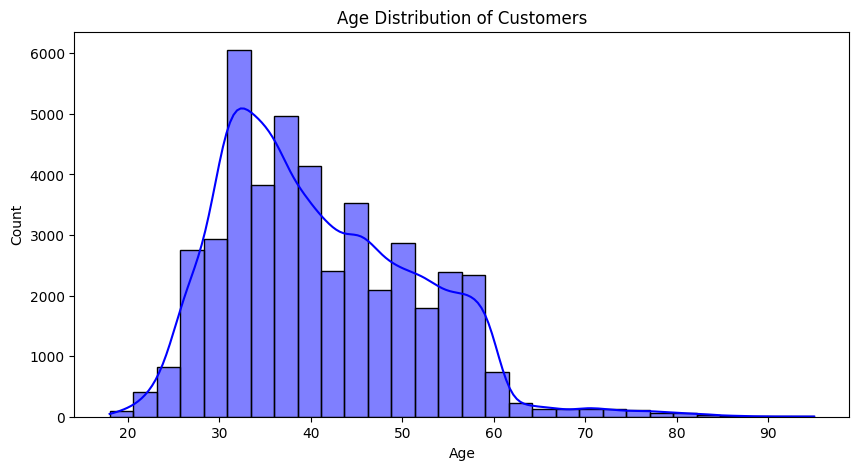

In [30]:
#visualizing data distributions
#distribution of age
plt.figure(figsize=(10,5))
sns.histplot(df['age'],bins=30,kde=True,color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Job Type')

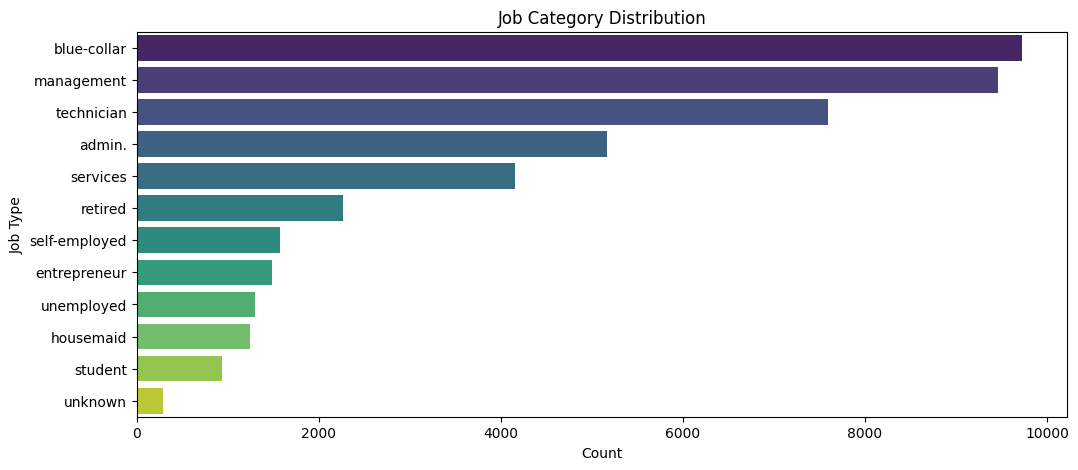

In [38]:
#count of job categories
plt.figure(figsize=(12,5))
sns.countplot(y=df['job'],order=df['job'].value_counts().index,palette="viridis")
plt.title("Job Category Distribution")
plt.xlabel("Count")
plt.ylabel("Job Type")

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

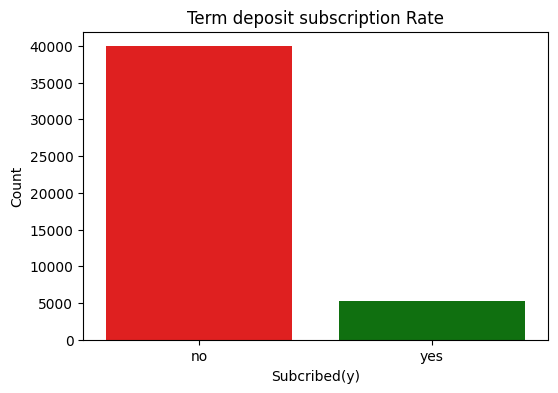

In [40]:
# subcription rate for term deposit(Target Variable 'y')
plt.figure(figsize=(6,4))
sns.countplot(x=df['y'],palette=['red','green'])
plt.title("Term deposit subscription Rate")
plt.xlabel("Subcribed(y)")
plt.ylabel("Count")

# Display percentage distribution
df['y'].value_counts(normalize=True) * 100

In [50]:
# Convert y to numeric values
df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Ensure y is 0 or 1

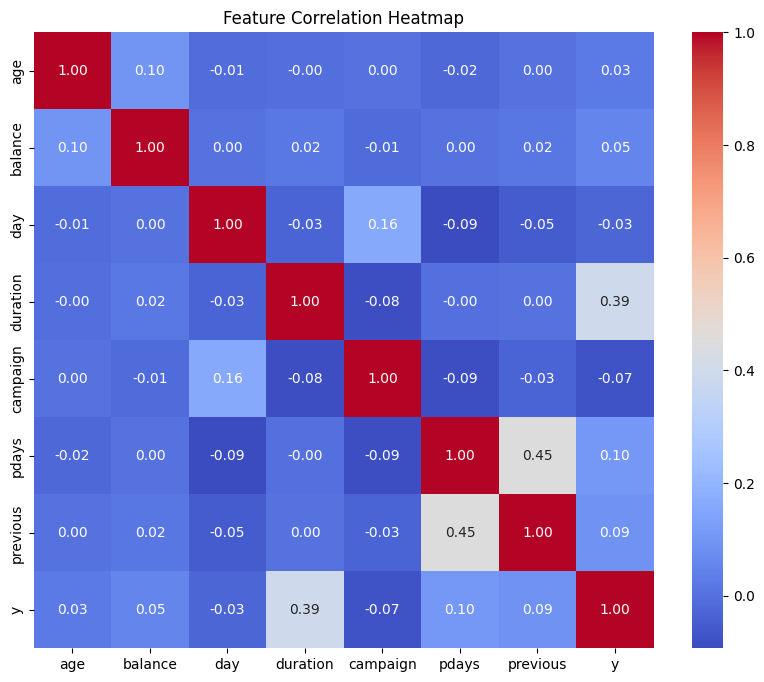

In [52]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [53]:
#Model Traing and encoding
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [54]:
# Create a copy of the original dataset
df_encoded = df.copy()

In [55]:
df_encoded

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  y  
0        unknown    5   may       261         1     -1         0  unknown  0  
1        unknown    5   may       151         1     -1         0  unknown  0  
2        unknown    5   may        76         1     -1         0  unknown  0  
3        unknown    5   may        92         1     -1         0  unknown  0  
4        unknown    5   may       198         1     -1         0  unknown  0  
...          ...  ...   ...       ...       ...    ...       ...      ... ..  
45206   cellular   17   nov       977         3     -1         0  unknown  1  
45207   cellular   17   nov       456         2     -1         0  unknown  1  
45208   cellular   17   nov      1127         5    184         3  success  1  
45209  telephone   17   nov       508         4     -1         0  unknown  0  
45210   cellular   17   nov       361         2    188        11    other  0  

[45211 rows x 17 columns]

In [56]:
# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [58]:
# Binary categorical columns
binary_cols = ['default', 'housing', 'loan']

# Apply Label Encoding
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("✅ Label Encoding Completed for Binary Columns.")

✅ Label Encoding Completed for Binary Columns.


In [59]:
# Multi-Class categorical columns (excluding binary ones)
multi_class_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)

print("✅ One-Hot Encoding Completed for Multi-Class Categorical Columns.")

✅ One-Hot Encoding Completed for Multi-Class Categorical Columns.


In [61]:
df_encoded.info()# Ensure no 'object' type columns remain
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...      False      False      False       True      False   
1         0  ...      False      False      False       True      False   
2         0  ...      False      False      False       True      False   
3         0  ...      False      False      False       True      False   
4         0  ...      False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0      False      False           False             False              True  
1      False      False           False             False              True  
2      False      False           False             False              True  
3      False      False           False             False              True  
4      False      False           False             False              True  

[5 rows x 43 columns]

In [66]:
X = df_encoded.drop(columns=['y'])  # Features (everything except target)
y = df_encoded['y']  # Target variable (0 = No, 1 = Yes)

In [67]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shape to confirm split
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (36168, 42), Testing Data: (9043, 42)


In [71]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate model performance
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Accuracy: 0.9001437576025655
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



C:\Users\Mahendra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest Accuracy: 0.9058940617051864
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.39      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



In [96]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
print("🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_xgb))


🔹 XGBoost Accuracy: 0.9068893066460245
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.67      0.41      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043



In [78]:
# Print AUC-ROC scores
print("🔹 Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_log))
print("🔹 Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
print("🔹 XGBoost AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))

# Print Confusion Matrices
print("\n🔹 Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\n🔹 Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n🔹 XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🔹 Logistic Regression AUC-ROC: 0.6560658394224521
🔹 Random Forest AUC-ROC: 0.6831003429161246
🔹 XGBoost AUC-ROC: 0.6914533748888807

🔹 Logistic Regression Confusion Matrix:
 [[7783  202]
 [ 701  357]]

🔹 Random Forest Confusion Matrix:
 [[7777  208]
 [ 643  415]]

🔹 XGBoost Confusion Matrix:
 [[7767  218]
 [ 624  434]]


In [94]:
# Get predicted probabilities for XGBoost
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probability for class 1

# Change threshold to 0.3 (instead of 0.5)
y_pred_adjusted = (y_probs >= 0.3).astype(int)

print("🔹 Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))


🔹 Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7985
           1       0.56      0.67      0.61      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.80      0.78      9043
weighted avg       0.91      0.90      0.90      9043



In [99]:
#Add model predictions to the original dataset
df_encoded["Predicted_Subscription"] = xgb_model.predict(X)

# Save the dataset to a CSV file
df_encoded.to_csv("bank_marketing_with_predictions.csv", index=False)

In [100]:
print("✅ Data saved successfully as 'bank_marketing_with_predictions.csv'")

✅ Data saved successfully as 'bank_marketing_with_predictions.csv'


In [101]:
# Make a copy of the original dataset (before encoding)
df_with_predictions = df.copy()

# Add model predictions (ensure X columns match df columns)
df_with_predictions["Predicted_Subscription"] = xgb_model.predict(X)

# Save to CSV
df_with_predictions.to_csv("bank_marketing_original_with_predictions.csv", index=False)

print("✅ Data saved successfully as 'bank_marketing_original_with_predictions.csv'")


✅ Data saved successfully as 'bank_marketing_original_with_predictions.csv'


In [103]:
df_with_predictions.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  \
0  unknown    5   may       261         1     -1         0  unknown  0   
1  unknown    5   may       151         1     -1         0  unknown  0   
2  unknown    5   may        76         1     -1         0  unknown  0   
3  unknown    5   may        92         1     -1         0  unknown  0   
4  unknown    5   may       198         1     -1         0  unknown  0   

   Predicted_Subscription  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0